In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("WhatsApp Chat with Online Class Hope AI.txt",header=None,error_bad_lines=False,encoding='utf8')

b'Skipping line 130: expected 4 fields, saw 8\nSkipping line 343: expected 4 fields, saw 7\nSkipping line 664: expected 4 fields, saw 5\nSkipping line 666: expected 4 fields, saw 5\nSkipping line 1010: expected 4 fields, saw 5\nSkipping line 1337: expected 4 fields, saw 6\nSkipping line 1338: expected 4 fields, saw 6\nSkipping line 1346: expected 4 fields, saw 5\nSkipping line 1355: expected 4 fields, saw 9\n'


In [3]:
df.drop(columns=[2, 3], inplace=True)
df

,0,1
0,23/07/2023,6:16 am - Messages and calls are end-to-end e...
1,23/07/2023,6:16 am - Online Class Hope AI: *M.Manikandan...
2,📆 Customised Career Path Call has been Booked.,NaN
3,📝 *Meeting Details*,NaN
4,*Scheduled Time:* 03:45pm - Wednesday,July 26
...,...,...
1270,29/04/2024,9:15 am - Manika: <Media omitted>
1271,29/04/2024,9:52 am - Manika: <Media omitted>
1272,29/04/2024,9:56 am - Manika: <Media omitted>
1273,07/05/2024,10:48 pm - Manika: https://github.com/AI23man...


In [4]:

df.columns=['Date','Chat']
Message=df["Chat"].str.split("-",n=1,expand=True)
df["Time"]=Message[0]
Message1=Message[1].str.split(":",n=1,expand=True)
df["Name"]=Message1[0]
df["Chat"]=Message1[1]
df=df[["Date","Time","Name","Chat"]]
df

,Date,Time,Name,Chat
0,23/07/2023,6:16 am,Messages and calls are end-to-end encrypted. ...,None
1,23/07/2023,6:16 am,Online Class Hope AI,*M.Manikandan* *!! Successfully your slot has...
2,📆 Customised Career Path Call has been Booked.,NaN,NaN,NaN
3,📝 *Meeting Details*,NaN,NaN,NaN
4,*Scheduled Time:* 03:45pm - Wednesday,July 26,None,None
...,...,...,...,...
1270,29/04/2024,9:15 am,Manika,<Media omitted>
1271,29/04/2024,9:52 am,Manika,<Media omitted>
1272,29/04/2024,9:56 am,Manika,<Media omitted>
1273,07/05/2024,10:48 pm,Manika,https://github.com/AI23mani/Time_Series_All_A...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 4 columns):
Date    1275 non-null object
Time    1001 non-null object
Name    950 non-null object
Chat    943 non-null object
dtypes: object(4)
memory usage: 40.0+ KB


In [6]:
#!pip install nltk

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MANIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
dataset=df

In [9]:
dataset.dropna(inplace=True)

C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
sid = SentimentIntensityAnalyzer()

In [11]:
senti=sid.polarity_scores(dataset['Chat'][1274])

In [12]:
senti

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [13]:
 def sentimentalAnalysis(data,columnname):
        
        #downloading vader_lexicon for the process
        import matplotlib.pyplot as plt
        import seaborn as sns
        "Importing Necessary Packeage"
        from nltk.sentiment.vader import SentimentIntensityAnalyzer
        sid = SentimentIntensityAnalyzer()
        
        "Deleting null pr empty value"
        data.dropna(inplace=True)
        
        "Checking for a comment"
        #sid.polarity_scores(data[columnname][93])
        
        "Creating respective columns"
        
        data['scores'] = data[columnname].apply(lambda commentText: sid.polarity_scores(commentText))
        data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
        data['Negtive']  = data['scores'].apply(lambda score_dict: score_dict['neg'])
        data['Postive']  = data['scores'].apply(lambda score_dict: score_dict['pos'])
        data['Neutral']  = data['scores'].apply(lambda score_dict: score_dict['neu'])
        
        "Creating final pos or neg using compound score"
        data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
        plt.clf()
        #comp=sns.countplot(x = 'comp_score', hue = 'Name', data = data, palette = 'magma')
        #comp.figure.savefig("date_charts.png")
        "Checking how many pos and neg"
        posneg=pd.DataFrame(data['comp_score'].value_counts())
        return posneg,data
    

In [14]:
pos,data_Senti=sentimentalAnalysis(dataset,columnname='Chat')

C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

<Figure size 640x480 with 0 Axes>

In [15]:
data_Senti

,Date,Time,Name,Chat,scores,compound,Negtive,Postive,Neutral,comp_score
1,23/07/2023,6:16 am,Online Class Hope AI,*M.Manikandan* *!! Successfully your slot has...,"{'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'comp...",0.6219,0.0,0.368,0.632,pos
12,25/07/2023,8:54 pm,Manika,Please update my mail id,"{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp...",0.3182,0.0,0.365,0.635,pos
13,25/07/2023,8:54 pm,Manika,maridevamani90@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
14,25/07/2023,8:55 pm,Manika,Tomorrow my schedule time,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
15,25/07/2023,8:55 pm,Manika,Link still not come,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
...,...,...,...,...,...,...,...,...,...,...
1270,29/04/2024,9:15 am,Manika,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
1271,29/04/2024,9:52 am,Manika,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
1272,29/04/2024,9:56 am,Manika,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
1273,07/05/2024,10:48 pm,Manika,https://github.com/AI23mani/Time_Series_All_A...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos


In [16]:
pos

,comp_score
pos,931
neg,12


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
import pandas as pd


# Count Vectorization
count_vectorizer = CountVectorizer(max_df=1.0, min_df=1, stop_words='english')  # Adjust min_df and max_df values
dtm = count_vectorizer.fit_transform(df['Chat'])

# NMF Model
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(dtm)

# Display the top words for each topic
for index, topic in enumerate(nmf_model.components_):
    top_words_indices = topic.argsort()[-10:]
    top_words = [count_vectorizer.get_feature_names()[i] for i in top_words_indices]
    print(f"Topic {index + 1}: {top_words}")


Topic 1: ['exclusively', 'excellence', 'excelled', 'errror', 'error', 'eppdi', 'enuku', 'feedback', 'media', 'omitted']
Topic 2: ['assignment', 'www', 'ipynb', 'blob', 'main', 'python', 'ai23mani', 'github', 'com', 'https']
Topic 3: ['sent', 'msz', 'search', 'money', 'reply', 'plz', 'google', 'thanks', 'ok', 'mam']
Topic 4: ['official', 'exclusively', 'vijai', 'received', 'kindly', 'ramisha', 'audio', 'number', 'deleted', 'message']
Topic 5: ['ipynb', 'send', 'link', 'thanks', 'noted', 'ma', 'kindly', 'madam', 'sir', 'ok']


C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
topic_results=nmf_model.transform(dtm)
df["Topic"]=topic_results.argmax(axis=1)


C:\Users\MANIKA\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df

,Date,Time,Name,Chat,scores,compound,Negtive,Postive,Neutral,comp_score,Topic
1,23/07/2023,6:16 am,Online Class Hope AI,*M.Manikandan* *!! Successfully your slot has...,"{'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'comp...",0.6219,0.0,0.368,0.632,pos,4
12,25/07/2023,8:54 pm,Manika,Please update my mail id,"{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp...",0.3182,0.0,0.365,0.635,pos,4
13,25/07/2023,8:54 pm,Manika,maridevamani90@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,1
14,25/07/2023,8:55 pm,Manika,Tomorrow my schedule time,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,1
15,25/07/2023,8:55 pm,Manika,Link still not come,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,4
...,...,...,...,...,...,...,...,...,...,...,...
1270,29/04/2024,9:15 am,Manika,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,0
1271,29/04/2024,9:52 am,Manika,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,0
1272,29/04/2024,9:56 am,Manika,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,0
1273,07/05/2024,10:48 pm,Manika,https://github.com/AI23mani/Time_Series_All_A...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,1


In [20]:
df["Topic"].value_counts()

0    549
4    164
2    107
1     78
3     45
Name: Topic, dtype: int64

In [21]:
#!pip install wordCloud

In [22]:
dataset=df
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MANIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

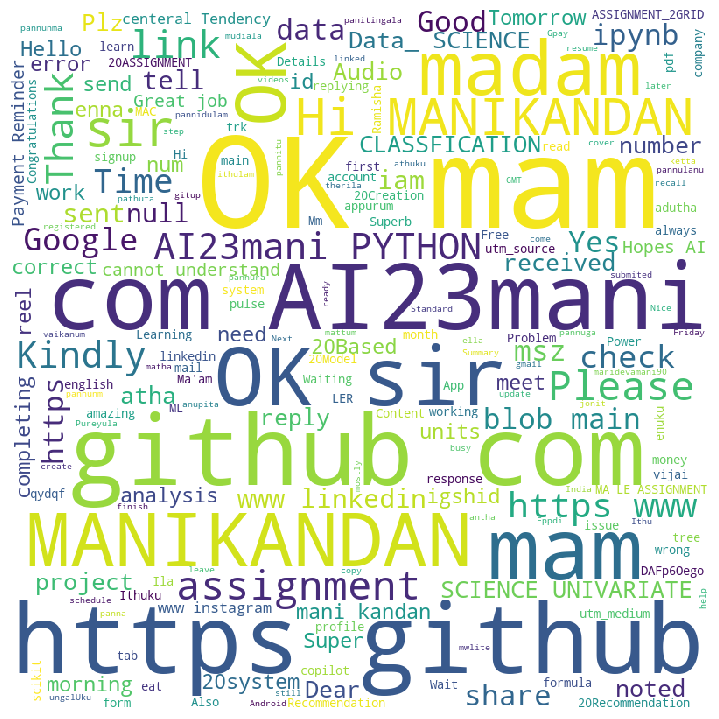

Successfully created


In [23]:
comment_words = []
stoplist = stopwords.words('english')
stoplist.extend(['omitted', 'voice','missed','call','video','deleted','media','message'])
wordcloudss="This function saves image"
dataset.index=range(dataset.shape[0])
for i in range(1,len(dataset)): 
    comment_words.append(dataset['Chat'][i])
    vv=" ".join(comment_words)          
    wordcloud = WordCloud(width = 800, height = 800, 
                                background_color ='white', 
                                      stopwords = stoplist, 
                                      min_font_size = 10).generate(vv)         
plt.figure(figsize = (9, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('wordcloud.PNG')
plt.show() 
print("Successfully created")
wordcloudss="This function saves image"
